In [52]:
# @title Preamble
import numpy as np
import math
import plotly.graph_objects as go
import matplotlib.pyplot as plt

### Evaluation

In [53]:
def run_kut4(F,x,y,h):
    K1 = F(x,y)
    K2 = F(x + h/2.0, y + K1/2.0)
    K3 = F(x + h/2.0, y + K2/2.0)
    K4 = F(x + h, y + K3)
    return (h/6.0)*(K1 + 2.0*K2 + 2.0*K3 + K4)

def integrate(F,x,y,xStop,h):
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    while x < xStop:
        h = min(h,xStop - x)
        y = y + run_kut4(F,x,y,h)
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)

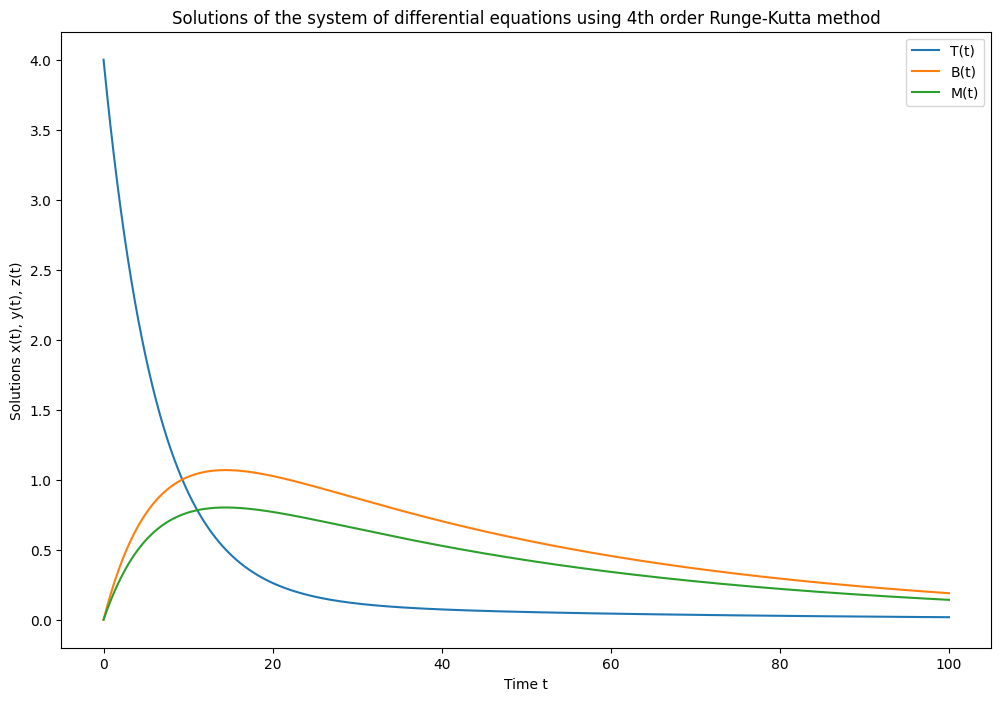

In [55]:
def runge_kutta_4(f, x0, y0, z0, t0, t_end, dt):
    # Number of steps
    n = math.ceil((t_end - t0) / dt)
    
    # Arrays to store the solutions at each time step
    t = np.zeros(n+1)
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    z = np.zeros(n+1)
    
    # Initial conditions
    x[0] = x0
    y[0] = y0
    z[0] = z0
    t[0] = t0
    
    # Runge-Kutta 4th order integration
    for i in range(n):  
        k1T, k1B, k1M = f(
            x[i], 
            y[i], 
            z[i], 
        )
        k2T, k2B, k2M = f(
            x[i] + 0.5*dt*k1T, 
            y[i] + 0.5*dt*k1B, 
            z[i] + 0.5*dt*k1M
        )
        k3T, k3B, k3M = f(
            x[i] + 0.5*dt*k2T, 
            y[i] + 0.5*dt*k2B, 
            z[i] + 0.5*dt*k2M
        )
        k4T, k4B, k4M = f(
            x[i] + dt*k3T, 
            y[i] + dt*k3B, 
            z[i] + dt*k3M
        )
        
        x[i+1] = x[i] + (dt/6)*(k1T + 2*k2T + 2*k3T + k4T)
        y[i+1] = y[i] + (dt/6)*(k1B + 2*k2B + 2*k3B + k4B)
        z[i+1] = z[i] + (dt/6)*(k1M + 2*k2M + 2*k3M + k4M)
        t[i+1] = t[i] + dt
        
    return t, x, y, z

def system(T, B, M):
    # constants 
    w = 65
    beta = 0.25
    a = 10
    b = 0.05
    c = 3.8
    d = 0.11    

    # list of functions 
    dTdt = -a*(1/w)*T + b*beta*B
    dBdt = c*(1/w)*T - 0.11*beta*B
    dMdt = ((1/w) - beta*(1/w)) * c * T - (beta-(beta ** 2))* d * B

    return dTdt, dBdt, dMdt

# Initial conditions
x0, y0, z0 = 2.0, 0.0, 0.0
t0 = 0.0
t_end = 100.0
dt = 0.01

# Solve the system using the Runge-Kutta method
t, x, y, z = runge_kutta_4(system, x0, y0, z0, t0, t_end, dt)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(t, x, label='T(t)')
plt.plot(t, y, label='B(t)')
plt.plot(t, z, label='M(t)')
plt.xlabel('Time t')
plt.ylabel('Solutions x(t), y(t), z(t)')
plt.legend()
plt.title('Solutions of the system of differential equations using 4th order Runge-Kutta method')
plt.show()
